In [2]:
from torchvision import models
dir(models)
alexnet = models.AlexNet()

In [2]:
resnet = models.resnet101(pretrained=True)
resnet

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Saving Edited final.png to Edited final (1).png


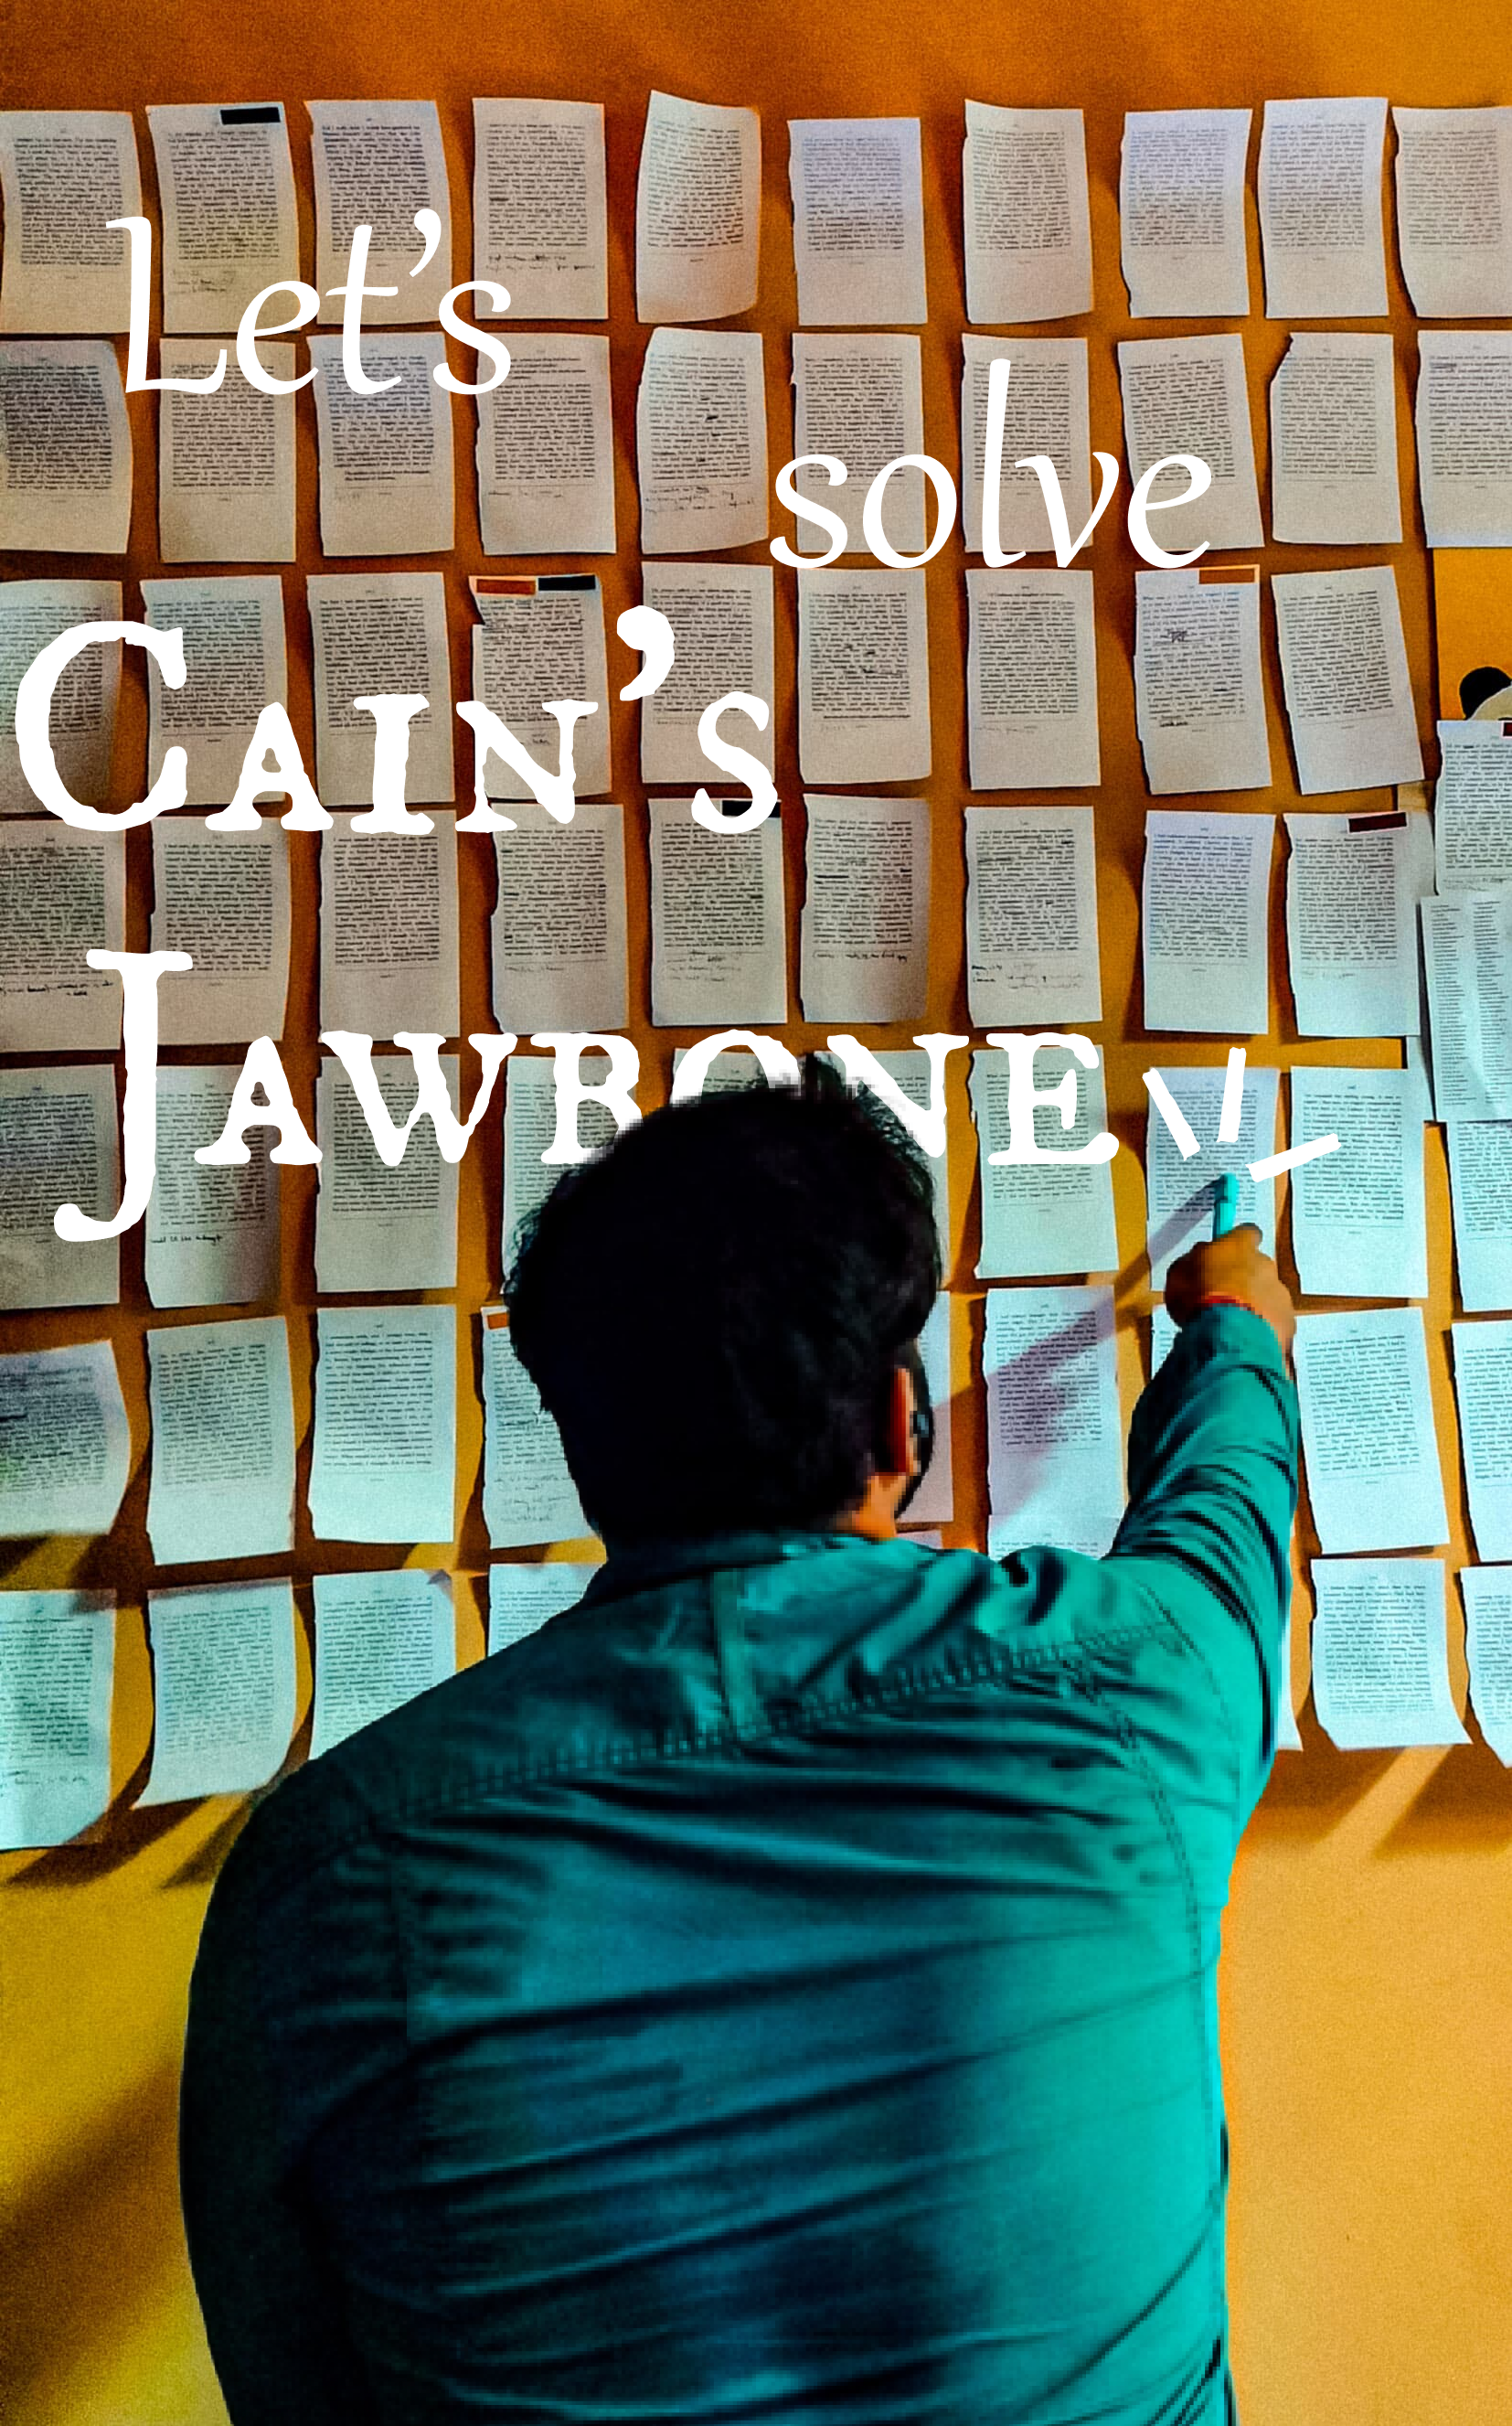

In [6]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("Edited final.png")
img

In [9]:
from torchvision import transforms
from PIL import Image

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # Convert the image to RGB before normalizing
    transforms.Lambda(lambda x: x[:3, :, :]),  # Keep only the first 3 channels (RGB)
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# ... (rest of your code) ...

# Open the image and ensure it's in RGB format
img = Image.open("Edited final.png").convert('RGB')

img_t = preprocess(img)

In [11]:
# ipython-input-10-9e81f8827a7d
import torch
from torchvision import models  # Import models module

# Load the ResNet model (this line is likely missing)
resnet = models.resnet101(pretrained=True)

batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:04<00:00, 37.0MB/s]


tensor([[-3.9860e+00, -8.3856e-01, -1.7645e-01, -4.1008e+00, -1.5532e+00,
          1.0393e-01, -4.0345e-01,  1.3228e+00,  1.9224e+00, -1.9760e+00,
         -1.5827e+00, -1.0482e+00, -3.5671e+00,  1.3304e+00, -1.8928e+00,
         -2.6453e+00, -1.1218e+00, -3.5201e+00, -1.9474e+00, -8.4659e-01,
         -1.5001e+00, -4.7389e+00, -4.5529e+00, -2.1859e+00, -4.4539e+00,
         -5.0846e+00, -3.5649e+00, -2.1883e+00, -2.8935e+00, -2.9817e+00,
         -3.8557e+00, -3.0932e+00, -6.5529e+00, -3.7294e+00, -4.1741e+00,
         -6.0508e+00, -1.0607e+00, -2.7468e+00, -3.4110e+00, -1.4554e+00,
         -1.2537e+00, -2.7978e+00, -4.4842e+00, -3.5361e+00, -1.8596e+00,
         -3.2538e+00,  2.4569e-01, -3.8156e+00, -3.7589e+00, -6.8315e-01,
         -3.2321e+00, -1.4677e+00, -1.9395e+00, -1.5423e+00, -2.6103e+00,
         -2.0297e+00, -3.0793e+00, -1.7932e+00, -3.4624e+00, -1.4894e+00,
          5.6136e-01, -2.9465e+00, -3.3920e+00, -3.5390e+00, -1.3595e+00,
         -2.6714e+00, -2.8677e+00, -2.

In [13]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()x`

--2024-10-01 05:54:52--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-10-01 05:54:52 (85.0 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



('prison', 86.0736312866211)